# Week 10.3.2 Generating word embeddings using Gensim Word2Vec

## Word embeddings and Word2Vec

In [1]:
# imports needed and logging
import gzip
import gensim 
import logging
 
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
 

c:\users\wei\appdata\local\conda\conda\envs\py3.7\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## Dataset

This notebook is based on the Kavita Ganesan's tutorial, 

http://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/

with the dataset `reviews_data.txt.gz` available at: 

https://github.com/kavgan/data-science-tutorials/tree/master/word2vec

The dataset is a single text file concatenated from 259K full hote reviews from OpinRank. The full OpinRank dataset also has car reviews, which is available at the UCI Machine Learning Repository.

http://archive.ics.uci.edu/ml/datasets/opinrank+review+dataset

#### Hotel Reviews

- Full reviews of hotels in 10 different cities (Dubai, Beijing, London, New York City, New Delhi, San Francisco, Shanghai, Montreal, Las Vegas, Chicago) 
- There are about 80-700 hotels in each city 
- Extracted fields include date, review title and the full review 
- Total number of reviews: ~259,000

In [2]:
data_file="reviews_data.txt.gz"

with gzip.open ('reviews_data.txt.gz', 'rb') as f:
    for i,line in enumerate (f):
        print(line)
        break

b"Oct 12 2009 \tNice trendy hotel location not too bad.\tI stayed in this hotel for one night. As this is a fairly new place some of the taxi drivers did not know where it was and/or did not want to drive there. Once I have eventually arrived at the hotel, I was very pleasantly surprised with the decor of the lobby/ground floor area. It was very stylish and modern. I found the reception's staff geeting me with 'Aloha' a bit out of place, but I guess they are briefed to say that to keep up the coroporate image.As I have a Starwood Preferred Guest member, I was given a small gift upon-check in. It was only a couple of fridge magnets in a gift box, but nevertheless a nice gesture.My room was nice and roomy, there are tea and coffee facilities in each room and you get two complimentary bottles of water plus some toiletries by 'bliss'.The location is not great. It is at the last metro stop and you then need to take a taxi, but if you are not planning on going to see the historic sites in Be

In [3]:
def read_input(input_file):
    """This method reads the input file which is in gzip format"""
    
    logging.info("reading file {0}...this may take a while".format(input_file))
    
    with gzip.open (input_file, 'rb') as f:
        for i, line in enumerate (f): 

            if (i%10000==0):
                logging.info ("read {0} reviews".format (i))
            # do some pre-processing and return a list of words for each review text
            yield gensim.utils.simple_preprocess (line)

# read the tokenized reviews into a list
# each review item becomes a serries of words
# so this becomes a list of lists
documents = list (read_input (data_file))
logging.info ("Done reading data file")

2018-11-14 00:48:36,725 : INFO : reading file reviews_data.txt.gz...this may take a while
2018-11-14 00:48:36,727 : INFO : read 0 reviews
2018-11-14 00:48:47,074 : INFO : read 10000 reviews
2018-11-14 00:48:57,203 : INFO : read 20000 reviews
2018-11-14 00:49:09,110 : INFO : read 30000 reviews
2018-11-14 00:49:20,901 : INFO : read 40000 reviews
2018-11-14 00:49:33,682 : INFO : read 50000 reviews
2018-11-14 00:49:48,456 : INFO : read 60000 reviews
2018-11-14 00:50:00,833 : INFO : read 70000 reviews
2018-11-14 00:50:09,571 : INFO : read 80000 reviews
2018-11-14 00:50:18,944 : INFO : read 90000 reviews
2018-11-14 00:50:30,246 : INFO : read 100000 reviews
2018-11-14 00:50:40,169 : INFO : read 110000 reviews
2018-11-14 00:50:51,610 : INFO : read 120000 reviews
2018-11-14 00:51:00,524 : INFO : read 130000 reviews
2018-11-14 00:51:11,067 : INFO : read 140000 reviews
2018-11-14 00:51:17,661 : INFO : read 150000 reviews
2018-11-14 00:51:26,002 : INFO : read 160000 reviews
2018-11-14 00:51:33,623

## Understanding some of the parameters

To train the model earlier, we had to set some parameters. Now, let's try to understand what some of them mean. For reference, this is the command that we used to train the model.

`model = gensim.models.Word2Vec (documents, size=150, window=10, min_count=2, workers=10)`

#### size
The size of the dense vector to represent each token or word. If you have very limited data, then size should be a much smaller value. If you have lots of data, its good to experiment with various sizes. A value of 100-150 has worked well for me.

#### window
The maximum distance between the target word and its neighboring word. If your neighbor's position is greater than the maximum window width to the left and the right, then, some neighbors are not considered as being related to the target word. In theory, a smaller window should give you terms that are more related. If you have lots of data, then the window size should not matter too much, as long as its a decent sized window.

#### min_count
Minimium frequency count of words. The model would ignore words that do not statisfy the min_count. Extremely infrequent words are usually unimportant, so its best to get rid of those. Unless your dataset is really tiny, this does not really affect the model.

#### workers
How many threads to use behind the scenes?

In [6]:
model = gensim.models.Word2Vec (documents, size=150, window=10, min_count=2, workers=10)
model.train(documents,total_examples=len(documents),epochs=10)

2018-11-14 02:31:57,845 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2018-11-14 02:31:57,848 : INFO : collecting all words and their counts
2018-11-14 02:31:57,852 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-11-14 02:31:58,573 : INFO : PROGRESS: at sentence #10000, processed 1655714 words, keeping 25777 word types
2018-11-14 02:31:59,279 : INFO : PROGRESS: at sentence #20000, processed 3317863 words, keeping 35016 word types
2018-11-14 02:32:00,125 : INFO : PROGRESS: at sentence #30000, processed 5264072 words, keeping 47518 word types
2018-11-14 02:32:01,197 : INFO : PROGRESS: at sentence #40000, processed 7081746 words, keeping 56675 word types
2018-11-14 02:32:02,496 : INFO : PROGRESS: at sentence #50000, processed 9089491 words, keeping 63744 word types
2018-11-14 02:32:03,277 : INFO : PROGRESS: at sentence #60000, processed 11013726 words, keeping 76786 word types
2018-11-14 02:32:04,192 : INFO : PROGRESS: a

2018-11-14 02:33:22,951 : INFO : EPOCH 1 - PROGRESS: at 75.52% examples, 610989 words/s, in_qsize 18, out_qsize 1
2018-11-14 02:33:23,991 : INFO : EPOCH 1 - PROGRESS: at 77.13% examples, 607932 words/s, in_qsize 20, out_qsize 1
2018-11-14 02:33:24,996 : INFO : EPOCH 1 - PROGRESS: at 78.43% examples, 603029 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:33:26,015 : INFO : EPOCH 1 - PROGRESS: at 80.64% examples, 604594 words/s, in_qsize 20, out_qsize 0
2018-11-14 02:33:27,040 : INFO : EPOCH 1 - PROGRESS: at 82.48% examples, 602859 words/s, in_qsize 18, out_qsize 1
2018-11-14 02:33:28,039 : INFO : EPOCH 1 - PROGRESS: at 84.63% examples, 604550 words/s, in_qsize 20, out_qsize 0
2018-11-14 02:33:29,069 : INFO : EPOCH 1 - PROGRESS: at 87.37% examples, 608397 words/s, in_qsize 18, out_qsize 1
2018-11-14 02:33:30,083 : INFO : EPOCH 1 - PROGRESS: at 90.29% examples, 612866 words/s, in_qsize 16, out_qsize 3
2018-11-14 02:33:31,088 : INFO : EPOCH 1 - PROGRESS: at 93.06% examples, 617148 words/s,

2018-11-14 02:34:19,006 : INFO : EPOCH - 2 : training on 41519358 raw words (30349106 effective words) took 45.1s, 672605 effective words/s
2018-11-14 02:34:20,024 : INFO : EPOCH 3 - PROGRESS: at 1.90% examples, 595131 words/s, in_qsize 20, out_qsize 1
2018-11-14 02:34:21,050 : INFO : EPOCH 3 - PROGRESS: at 4.16% examples, 631110 words/s, in_qsize 14, out_qsize 5
2018-11-14 02:34:22,062 : INFO : EPOCH 3 - PROGRESS: at 5.94% examples, 604232 words/s, in_qsize 20, out_qsize 0
2018-11-14 02:34:23,078 : INFO : EPOCH 3 - PROGRESS: at 7.60% examples, 578784 words/s, in_qsize 20, out_qsize 0
2018-11-14 02:34:24,079 : INFO : EPOCH 3 - PROGRESS: at 9.01% examples, 555023 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:34:25,105 : INFO : EPOCH 3 - PROGRESS: at 9.87% examples, 514579 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:34:26,109 : INFO : EPOCH 3 - PROGRESS: at 10.93% examples, 496503 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:34:27,118 : INFO : EPOCH 3 - PROGRESS: at 12.39% examp

2018-11-14 02:35:24,090 : INFO : EPOCH 4 - PROGRESS: at 31.62% examples, 678552 words/s, in_qsize 20, out_qsize 0
2018-11-14 02:35:25,104 : INFO : EPOCH 4 - PROGRESS: at 33.70% examples, 673968 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:35:26,129 : INFO : EPOCH 4 - PROGRESS: at 35.96% examples, 672137 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:35:27,134 : INFO : EPOCH 4 - PROGRESS: at 38.65% examples, 676036 words/s, in_qsize 20, out_qsize 0
2018-11-14 02:35:28,136 : INFO : EPOCH 4 - PROGRESS: at 41.55% examples, 682387 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:35:29,164 : INFO : EPOCH 4 - PROGRESS: at 44.38% examples, 686136 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:35:30,197 : INFO : EPOCH 4 - PROGRESS: at 47.07% examples, 689309 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:35:31,232 : INFO : EPOCH 4 - PROGRESS: at 49.19% examples, 683925 words/s, in_qsize 20, out_qsize 0
2018-11-14 02:35:32,280 : INFO : EPOCH 4 - PROGRESS: at 51.08% examples, 677029 words/s,

2018-11-14 02:36:29,269 : INFO : EPOCH 5 - PROGRESS: at 64.05% examples, 565488 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:36:30,334 : INFO : EPOCH 5 - PROGRESS: at 65.70% examples, 562536 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:36:31,389 : INFO : EPOCH 5 - PROGRESS: at 67.36% examples, 559636 words/s, in_qsize 18, out_qsize 1
2018-11-14 02:36:32,389 : INFO : EPOCH 5 - PROGRESS: at 69.03% examples, 557972 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:36:33,402 : INFO : EPOCH 5 - PROGRESS: at 70.75% examples, 557342 words/s, in_qsize 15, out_qsize 4
2018-11-14 02:36:34,424 : INFO : EPOCH 5 - PROGRESS: at 72.42% examples, 555548 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:36:35,459 : INFO : EPOCH 5 - PROGRESS: at 73.72% examples, 550132 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:36:36,483 : INFO : EPOCH 5 - PROGRESS: at 75.14% examples, 547330 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:36:37,499 : INFO : EPOCH 5 - PROGRESS: at 77.42% examples, 551312 words/s,

2018-11-14 02:37:31,016 : INFO : EPOCH 1 - PROGRESS: at 81.49% examples, 582622 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:37:32,034 : INFO : EPOCH 1 - PROGRESS: at 83.46% examples, 582233 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:37:33,058 : INFO : EPOCH 1 - PROGRESS: at 85.35% examples, 582533 words/s, in_qsize 17, out_qsize 2
2018-11-14 02:37:34,077 : INFO : EPOCH 1 - PROGRESS: at 87.53% examples, 582801 words/s, in_qsize 20, out_qsize 6
2018-11-14 02:37:35,119 : INFO : EPOCH 1 - PROGRESS: at 89.91% examples, 584186 words/s, in_qsize 17, out_qsize 2
2018-11-14 02:37:36,155 : INFO : EPOCH 1 - PROGRESS: at 92.04% examples, 584219 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:37:37,156 : INFO : EPOCH 1 - PROGRESS: at 93.85% examples, 583316 words/s, in_qsize 17, out_qsize 2
2018-11-14 02:37:38,159 : INFO : EPOCH 1 - PROGRESS: at 95.81% examples, 583058 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:37:39,183 : INFO : EPOCH 1 - PROGRESS: at 97.64% examples, 581914 words/s,

2018-11-14 02:38:33,906 : INFO : worker thread finished; awaiting finish of 8 more threads
2018-11-14 02:38:33,907 : INFO : worker thread finished; awaiting finish of 7 more threads
2018-11-14 02:38:33,917 : INFO : worker thread finished; awaiting finish of 6 more threads
2018-11-14 02:38:33,919 : INFO : worker thread finished; awaiting finish of 5 more threads
2018-11-14 02:38:33,924 : INFO : worker thread finished; awaiting finish of 4 more threads
2018-11-14 02:38:33,929 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-14 02:38:33,935 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-14 02:38:33,940 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-14 02:38:33,943 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-14 02:38:33,946 : INFO : EPOCH - 2 : training on 41519358 raw words (30350668 effective words) took 53.7s, 565196 effective words/s
2018-11-14 02:38:34,967 : INFO : EPOCH 3 

2018-11-14 02:39:32,957 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-14 02:39:32,958 : INFO : EPOCH - 3 : training on 41519358 raw words (30349933 effective words) took 59.0s, 514440 effective words/s
2018-11-14 02:39:34,003 : INFO : EPOCH 4 - PROGRESS: at 1.79% examples, 551003 words/s, in_qsize 18, out_qsize 1
2018-11-14 02:39:35,038 : INFO : EPOCH 4 - PROGRESS: at 3.92% examples, 589154 words/s, in_qsize 18, out_qsize 1
2018-11-14 02:39:36,077 : INFO : EPOCH 4 - PROGRESS: at 5.94% examples, 591464 words/s, in_qsize 20, out_qsize 0
2018-11-14 02:39:37,084 : INFO : EPOCH 4 - PROGRESS: at 7.58% examples, 570710 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:39:38,100 : INFO : EPOCH 4 - PROGRESS: at 9.38% examples, 572597 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:39:39,105 : INFO : EPOCH 4 - PROGRESS: at 10.61% examples, 554999 words/s, in_qsize 20, out_qsize 0
2018-11-14 02:39:40,150 : INFO : EPOCH 4 - PROGRESS: at 11.45% examples, 518159 words/s, i

2018-11-14 02:40:37,116 : INFO : EPOCH 5 - PROGRESS: at 17.28% examples, 634085 words/s, in_qsize 18, out_qsize 1
2018-11-14 02:40:38,145 : INFO : EPOCH 5 - PROGRESS: at 19.26% examples, 642500 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:40:39,180 : INFO : EPOCH 5 - PROGRESS: at 20.33% examples, 620914 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:40:40,201 : INFO : EPOCH 5 - PROGRESS: at 21.84% examples, 607080 words/s, in_qsize 17, out_qsize 2
2018-11-14 02:40:41,238 : INFO : EPOCH 5 - PROGRESS: at 22.84% examples, 587909 words/s, in_qsize 14, out_qsize 5
2018-11-14 02:40:42,284 : INFO : EPOCH 5 - PROGRESS: at 24.00% examples, 578053 words/s, in_qsize 20, out_qsize 0
2018-11-14 02:40:43,324 : INFO : EPOCH 5 - PROGRESS: at 26.01% examples, 578311 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:40:44,327 : INFO : EPOCH 5 - PROGRESS: at 28.30% examples, 579768 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:40:45,340 : INFO : EPOCH 5 - PROGRESS: at 30.76% examples, 586417 words/s,

2018-11-14 02:41:42,302 : INFO : EPOCH 6 - PROGRESS: at 49.07% examples, 652109 words/s, in_qsize 17, out_qsize 2
2018-11-14 02:41:43,314 : INFO : EPOCH 6 - PROGRESS: at 51.28% examples, 651618 words/s, in_qsize 17, out_qsize 2
2018-11-14 02:41:44,354 : INFO : EPOCH 6 - PROGRESS: at 53.21% examples, 648989 words/s, in_qsize 17, out_qsize 2
2018-11-14 02:41:45,369 : INFO : EPOCH 6 - PROGRESS: at 55.62% examples, 649794 words/s, in_qsize 20, out_qsize 0
2018-11-14 02:41:46,386 : INFO : EPOCH 6 - PROGRESS: at 57.99% examples, 650990 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:41:47,387 : INFO : EPOCH 6 - PROGRESS: at 60.51% examples, 653502 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:41:48,398 : INFO : EPOCH 6 - PROGRESS: at 62.95% examples, 655169 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:41:49,437 : INFO : EPOCH 6 - PROGRESS: at 65.39% examples, 654594 words/s, in_qsize 20, out_qsize 0
2018-11-14 02:41:50,439 : INFO : EPOCH 6 - PROGRESS: at 67.38% examples, 652824 words/s,

2018-11-14 02:42:46,855 : INFO : EPOCH 7 - PROGRESS: at 89.89% examples, 660928 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:42:47,879 : INFO : EPOCH 7 - PROGRESS: at 92.19% examples, 660300 words/s, in_qsize 20, out_qsize 0
2018-11-14 02:42:48,899 : INFO : EPOCH 7 - PROGRESS: at 94.23% examples, 658862 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:42:49,911 : INFO : EPOCH 7 - PROGRESS: at 96.20% examples, 656926 words/s, in_qsize 18, out_qsize 1
2018-11-14 02:42:51,005 : INFO : EPOCH 7 - PROGRESS: at 98.47% examples, 655681 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:42:51,558 : INFO : worker thread finished; awaiting finish of 9 more threads
2018-11-14 02:42:51,559 : INFO : worker thread finished; awaiting finish of 8 more threads
2018-11-14 02:42:51,569 : INFO : worker thread finished; awaiting finish of 7 more threads
2018-11-14 02:42:51,573 : INFO : worker thread finished; awaiting finish of 6 more threads
2018-11-14 02:42:51,576 : INFO : worker thread finished; awaiting 

2018-11-14 02:43:42,579 : INFO : EPOCH 9 - PROGRESS: at 10.90% examples, 687386 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:43:43,584 : INFO : EPOCH 9 - PROGRESS: at 12.64% examples, 683098 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:43:44,594 : INFO : EPOCH 9 - PROGRESS: at 14.52% examples, 673964 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:43:45,599 : INFO : EPOCH 9 - PROGRESS: at 16.29% examples, 666046 words/s, in_qsize 20, out_qsize 0
2018-11-14 02:43:46,657 : INFO : EPOCH 9 - PROGRESS: at 17.98% examples, 657364 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:43:47,674 : INFO : EPOCH 9 - PROGRESS: at 19.95% examples, 665112 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:43:48,690 : INFO : EPOCH 9 - PROGRESS: at 21.99% examples, 665496 words/s, in_qsize 15, out_qsize 4
2018-11-14 02:43:49,754 : INFO : EPOCH 9 - PROGRESS: at 23.91% examples, 669359 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:43:50,759 : INFO : EPOCH 9 - PROGRESS: at 26.35% examples, 673524 words/s,

2018-11-14 02:44:46,975 : INFO : EPOCH 10 - PROGRESS: at 49.53% examples, 659718 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:44:47,985 : INFO : EPOCH 10 - PROGRESS: at 51.71% examples, 658617 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:44:49,004 : INFO : EPOCH 10 - PROGRESS: at 53.87% examples, 658551 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:44:50,028 : INFO : EPOCH 10 - PROGRESS: at 56.41% examples, 660398 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:44:51,039 : INFO : EPOCH 10 - PROGRESS: at 58.91% examples, 662370 words/s, in_qsize 17, out_qsize 2
2018-11-14 02:44:52,045 : INFO : EPOCH 10 - PROGRESS: at 61.47% examples, 665222 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:44:53,059 : INFO : EPOCH 10 - PROGRESS: at 64.05% examples, 666073 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:44:54,069 : INFO : EPOCH 10 - PROGRESS: at 66.15% examples, 664732 words/s, in_qsize 19, out_qsize 0
2018-11-14 02:44:55,107 : INFO : EPOCH 10 - PROGRESS: at 68.34% examples, 663172

(303500146, 415193580)

# Looking at outputs

In [7]:
w1 = "dirty"
model.wv.most_similar (positive=w1)

2018-11-14 08:16:10,554 : INFO : precomputing L2-norms of word weight vectors


[('filthy', 0.8676961660385132),
 ('unclean', 0.7798585891723633),
 ('stained', 0.7776564359664917),
 ('dusty', 0.7703824043273926),
 ('smelly', 0.7673255205154419),
 ('grubby', 0.7343133687973022),
 ('disgusting', 0.7199239730834961),
 ('mouldy', 0.7197657227516174),
 ('dingy', 0.7150809168815613),
 ('gross', 0.7097429037094116)]

In [8]:
# look up top 6 words similar to 'polite'
w1 = ["polite"]
model.wv.most_similar (positive=w1,topn=6)

[('courteous', 0.9153151512145996),
 ('friendly', 0.833591103553772),
 ('cordial', 0.8001489639282227),
 ('curteous', 0.7874411344528198),
 ('professional', 0.7845367789268494),
 ('attentive', 0.7743358612060547)]

In [9]:
# look up top 6 words similar to 'france'
w1 = ["france"]
model.wv.most_similar (positive=w1,topn=6)

[('canada', 0.6657098531723022),
 ('germany', 0.654288649559021),
 ('barcelona', 0.6215354204177856),
 ('spain', 0.6194608807563782),
 ('manchester', 0.6129618883132935),
 ('england', 0.6103695631027222)]

In [10]:
# look up top 6 words similar to 'shocked'
w1 = ["shocked"]
model.wv.most_similar (positive=w1,topn=6)

[('horrified', 0.8145005106925964),
 ('amazed', 0.8025485277175903),
 ('astonished', 0.7458055019378662),
 ('stunned', 0.7420371770858765),
 ('surprised', 0.7330716252326965),
 ('dismayed', 0.729412317276001)]

In [11]:
# get everything related to stuff on the bed
w1 = ["bed",'sheet','pillow']
w2 = ['couch']
model.wv.most_similar (positive=w1,negative=w2,topn=10)

[('duvet', 0.7100784778594971),
 ('blanket', 0.6940445899963379),
 ('pillowcase', 0.6922006011009216),
 ('quilt', 0.6756016612052917),
 ('mattress', 0.6734163761138916),
 ('matress', 0.6659855246543884),
 ('foam', 0.6287295818328857),
 ('sheets', 0.625896692276001),
 ('pillows', 0.6181528568267822),
 ('coverlet', 0.5999768972396851)]

In [12]:
# similarity between two different words
model.wv.similarity(w1="dirty",w2="smelly")

0.7673254831386894

In [13]:
# similarity between two identical words
model.wv.similarity(w1="dirty",w2="dirty")

1.0

In [14]:
# similarity between two unrelated words
model.wv.similarity(w1="dirty",w2="clean")

0.2731035335860169

In [15]:
# Which one is the odd one out in this list?
model.wv.doesnt_match(["cat","dog","france"])

'france'

In [16]:
# Which one is the odd one out in this list?
model.wv.doesnt_match(["bed","pillow","duvet","shower"])

'shower'

## Visualising the word vectors in 2D space

Here we use a dimensionality reduction and visualisation package from Scikit-Learn, t-Distributed Stochastic Neighbor Embedding (t-SNE), which is particularly suited for visualising high dimensional data. Note that the dimension of our word vectors by choice is 150, typical numbers could be 50, 100, and 300. Among these numbers, a dimension of 300 has been shown as most effective in capturing the syntatic and semantic information of a word. But it will take much longer to train. 

In [18]:
# Need the interactive Tools for Matplotlib
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE

In [22]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,150), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()


<IPython.core.display.Javascript object>


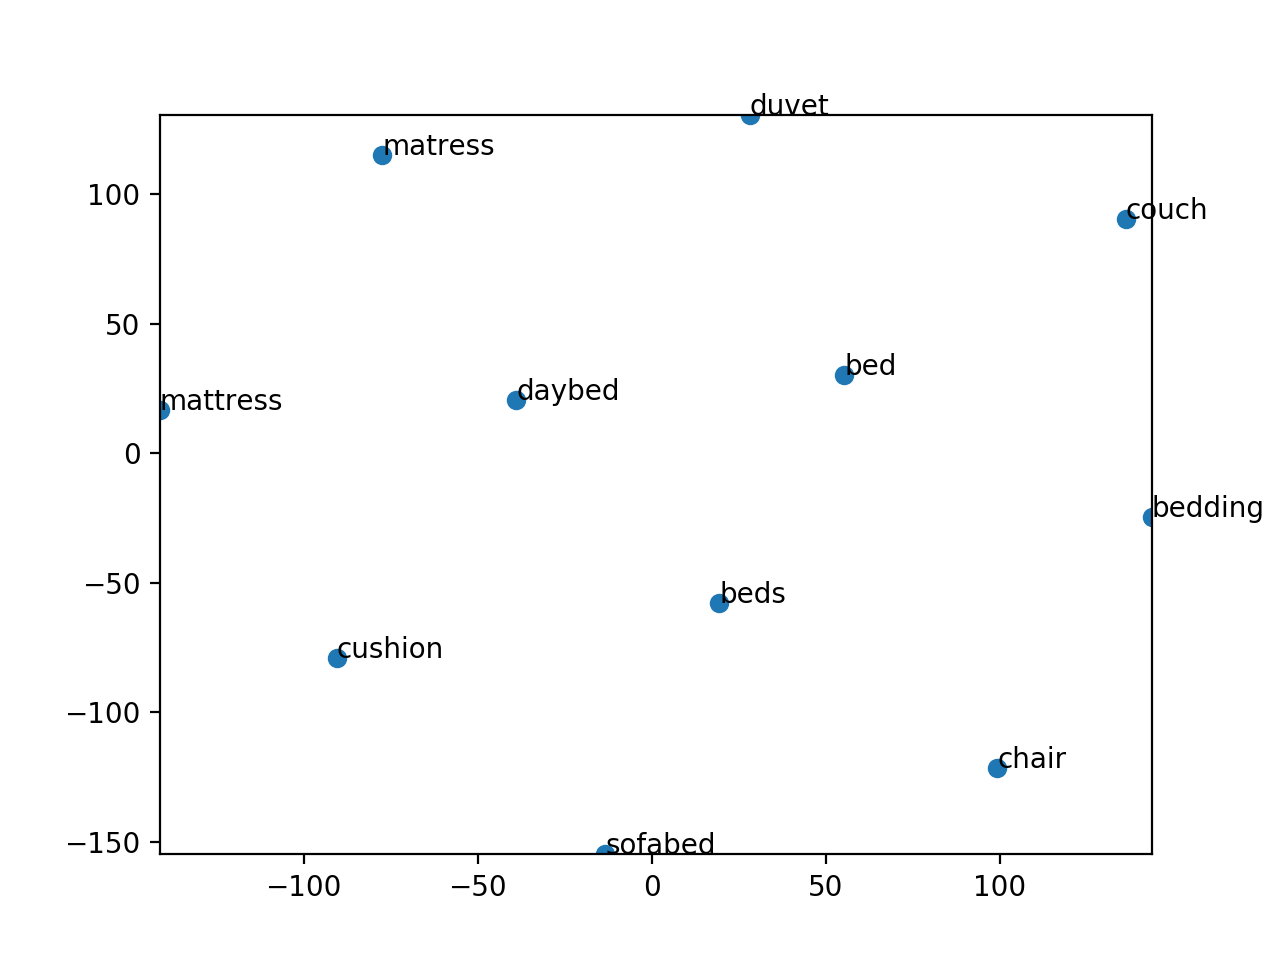

In [23]:
display_closestwords_tsnescatterplot(model.wv, "bed")